In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse

### Using KNN on cleaned data

In [3]:
# implement knn on cleaned data first
data = pd.read_csv("../cleaned_data_1.csv", header=0, index_col=0)
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,minumum_nights
0,0.0,107,0.000297,-0.000541,0.0,149,1,0.000002,0.000044,0.002668,0.999992,34,0.002740
1,0.0,126,0.000312,-0.000567,1.0,225,1,0.000003,0.000015,0.002720,0.999992,21,0.002817
2,0.0,93,0.000298,-0.000541,0.0,150,3,0.000000,0.000007,0.002669,0.999962,35,0.008219
3,0.0,41,0.000611,-0.001111,1.0,89,1,0.000070,0.000015,0.002915,0.999982,31,0.005155
4,0.0,61,0.047474,-0.086042,1.0,80,10,0.000116,0.001164,0.000000,0.000000,48,0.995159


In [4]:
X = data.drop('price', axis=1)

In [6]:
## get rid of price in X
X.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,minumum_nights
0,0.0,107,0.000297,-0.000541,0.0,1,0.000002,0.000044,0.002668,0.999992,34,0.002740
1,0.0,126,0.000312,-0.000567,1.0,1,0.000003,0.000015,0.002720,0.999992,21,0.002817
2,0.0,93,0.000298,-0.000541,0.0,3,0.000000,0.000007,0.002669,0.999962,35,0.008219
3,0.0,41,0.000611,-0.001111,1.0,1,0.000070,0.000015,0.002915,0.999982,31,0.005155
4,0.0,61,0.047474,-0.086042,1.0,10,0.000116,0.001164,0.000000,0.000000,48,0.995159


In [7]:
y = data.price

In [9]:
## get the price (target)
y.head(5)

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [11]:
## cross validation
X_train, X_test, y_train, y_test = split(X, y, train_size=0.7, random_state=314159)

In [53]:
## build model
knn_model_1 = KNeighborsRegressor().fit(X_train, y_train)

In [55]:
## predict y_train from x_train
y_train_pred = knn_model_1.predict(X_train)

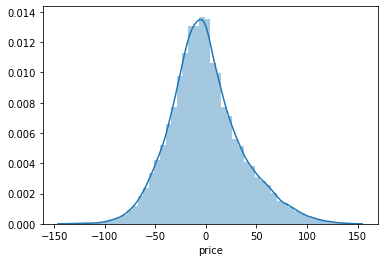

In [56]:
## plot
diff = y_train - y_train_pred
sns.distplot(diff)

In [22]:
## rmse for trained data
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

35.6844749207311

In [47]:
# y test prediction
y_test_pred = knn_model_1.predict(X_test)

In [49]:
# get top 20 of the price data
diff = y_test - y_test_pred

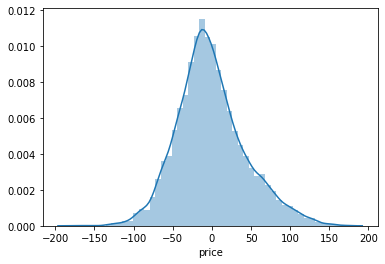

In [50]:
## plot
sns.distplot(diff)

In [57]:
# rmse for test data
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

44.203885837811285

### Using KNN on data with log transformation

In [59]:
# Using KNN on data with log transformation
data = pd.read_csv("../cleaned_data_1.csv", header=0, index_col=0)
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,minumum_nights
0,0.0,107,0.000297,-0.000541,0.0,149,1,0.000002,0.000044,0.002668,0.999992,34,0.002740
1,0.0,126,0.000312,-0.000567,1.0,225,1,0.000003,0.000015,0.002720,0.999992,21,0.002817
2,0.0,93,0.000298,-0.000541,0.0,150,3,0.000000,0.000007,0.002669,0.999962,35,0.008219
3,0.0,41,0.000611,-0.001111,1.0,89,1,0.000070,0.000015,0.002915,0.999982,31,0.005155
4,0.0,61,0.047474,-0.086042,1.0,80,10,0.000116,0.001164,0.000000,0.000000,48,0.995159


In [61]:
# log transformation
data["log_minimum_night"] = np.log(data["minimum_nights"] + 10**-15)
data["log_number_of_reviews"] = np.log(data["number_of_reviews"] + 10**-15)
data["log_review_per_month"] = np.log(data["reviews_per_month"] + 10**-15)
data["log_calculated_host_count"] = np.log(data["calculated_host_listings_count"] + 10**-15)
data["log_availability"] = np.log(data["availability_365"] + 10**-15)
data["log_name_length"] = np.log(data["name_length"] + 10**-15)
data["log_minumum_night"] = np.log(data["minumum_nights"] + 10**-15)
data = data.sample(n=data.shape[0])

In [62]:
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,minumum_nights,log_minimum_night,log_number_of_reviews,log_review_per_month,log_calculated_host_count,log_availability,log_name_length,log_minumum_night
37646,0.0,4,0.001954,-0.003544,1.0,98,3,0.000193,0.000096,0.006280,0.999710,49,0.022894,1.098612,-8.554245,-9.252380,-5.070330,-0.000290,3.891820,-3.776875
21871,0.0,83,0.002891,-0.005249,1.0,65,3,0.000050,0.000071,0.007388,0.999539,19,0.028833,1.098612,-9.908963,-9.552288,-4.907897,-0.000461,2.944439,-3.546240
25536,1.0,146,0.094780,-0.171285,1.0,58,5,0.000093,0.002318,0.000000,0.000000,32,0.980649,1.609438,-9.285784,-6.066908,-34.538776,-34.538776,3.465736,-0.019540
26535,0.0,64,0.115337,-0.209543,1.0,190,4,0.002011,0.002832,0.000000,0.000000,22,0.970967,1.386294,-6.209254,-5.866764,-34.538776,-34.538776,3.091042,-0.029463
4089,0.0,28,0.094249,-0.171217,0.0,50,5,0.000278,0.002316,0.000000,0.000000,26,0.980712,1.609438,-8.188320,-6.068057,-34.538776,-34.538776,3.258097,-0.019476


In [63]:
# drop price
X = data.drop('price', axis=1)

In [64]:
X.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,minumum_nights,log_minimum_night,log_number_of_reviews,log_review_per_month,log_calculated_host_count,log_availability,log_name_length,log_minumum_night
37646,0.0,4,0.001954,-0.003544,1.0,3,0.000193,0.000096,0.006280,0.999710,49,0.022894,1.098612,-8.554245,-9.252380,-5.070330,-0.000290,3.891820,-3.776875
21871,0.0,83,0.002891,-0.005249,1.0,3,0.000050,0.000071,0.007388,0.999539,19,0.028833,1.098612,-9.908963,-9.552288,-4.907897,-0.000461,2.944439,-3.546240
25536,1.0,146,0.094780,-0.171285,1.0,5,0.000093,0.002318,0.000000,0.000000,32,0.980649,1.609438,-9.285784,-6.066908,-34.538776,-34.538776,3.465736,-0.019540
26535,0.0,64,0.115337,-0.209543,1.0,4,0.002011,0.002832,0.000000,0.000000,22,0.970967,1.386294,-6.209254,-5.866764,-34.538776,-34.538776,3.091042,-0.029463
4089,0.0,28,0.094249,-0.171217,0.0,5,0.000278,0.002316,0.000000,0.000000,26,0.980712,1.609438,-8.188320,-6.068057,-34.538776,-34.538776,3.258097,-0.019476


In [65]:
y = data.price

In [109]:
## cross validation
X_train, X_test, y_train, y_test = split(X, y, train_size=0.7, random_state=314159)

In [110]:
## build model
knn_model_2 = KNeighborsRegressor().fit(X_train, y_train)

In [111]:
## predict y_train from x_train
y_train_pred = knn_model_1.predict(X_train)

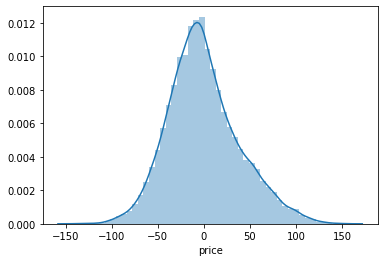

In [112]:
## plot
diff = y_train - y_train_pred
sns.distplot(diff)

In [113]:
## rmse for trained data
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

38.878993664782946

In [114]:
# y test prediction
y_test_pred = knn_model_1.predict(X_test)

In [115]:
# get top 20 of the price data
diff = y_test - y_test_pred

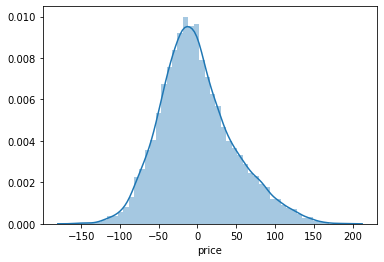

In [116]:
## plot
sns.distplot(diff)

In [118]:
## rmse for test data
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

48.09138087007997

Compared with cleaned data and also the cleaned data with log transformation applied, we can see that the model with cleaned data does a little bit better than the model with the other one. One reason that might cause this situtation is that the data with the log transformation with has too many features. 

### Use principal components

In [11]:
# Using principal components (train 1)
data = pd.read_csv("../train1.csv", header=0, index_col=0)
data.head(5)

,pca_component 0,pca_component 1,pca_component 2,pca_component 3,pca_component 4,pca_component 5,pca_component 6,pca_component 7,pca_component 8,pca_component 9,pca_component 10,price
0,111.257356,-19.034748,4.862769,5.177924,4.656782,-1.921391,-0.183095,-0.501683,0.228178,0.155032,-0.045540,42.0
1,83.044684,-16.618402,-1.045081,-27.007275,1.369359,-1.257543,1.601341,-0.070470,0.348136,0.057967,-0.059666,70.0
2,-40.735853,-16.486288,8.230134,2.939946,-0.154164,3.420576,-1.148351,0.267577,-0.051632,0.067243,-0.002725,120.0
3,52.478668,-20.196244,19.246323,40.140551,6.309285,2.801438,-0.923490,0.266367,-0.188993,0.018491,0.047119,120.0
4,-2.510515,-18.811422,-2.803176,16.615282,-20.676484,2.069589,-0.209310,0.216395,-0.523536,-0.190009,0.008872,120.0


In [12]:
test_data = pd.read_csv("../test1.csv", header=0, index_col=0)
test_data.head(5)

,pca_component 0,pca_component 1,pca_component 2,pca_component 3,pca_component 4,pca_component 5,pca_component 6,pca_component 7,pca_component 8,pca_component 9,pca_component 10,price
0,108.926041,27.386655,6.421149,-14.615405,-3.498109,0.131333,-0.102821,0.474863,-0.030184,0.034442,-0.020059,185.0
1,-75.767410,29.599789,-18.121252,14.259126,4.108675,-0.400869,-0.484841,-0.533457,0.513539,-0.183396,-0.009645,65.0
2,85.211003,-18.074420,4.772577,-0.946582,5.378793,-1.653010,1.458139,-0.109237,0.222179,0.048921,-0.061030,100.0
3,-10.862716,-15.880150,3.203471,-13.939000,1.920309,1.620542,2.286855,0.066728,0.680827,-0.272484,-0.062163,199.0
4,22.114263,27.336957,11.271736,10.756515,-3.451199,-0.873701,-0.727680,0.325945,0.262835,-0.080813,0.005097,170.0


In [13]:
# drop price
X_train = data.drop('price', axis=1)

In [14]:
X_train.head()

,pca_component 0,pca_component 1,pca_component 2,pca_component 3,pca_component 4,pca_component 5,pca_component 6,pca_component 7,pca_component 8,pca_component 9,pca_component 10
0,111.257356,-19.034748,4.862769,5.177924,4.656782,-1.921391,-0.183095,-0.501683,0.228178,0.155032,-0.045540
1,83.044684,-16.618402,-1.045081,-27.007275,1.369359,-1.257543,1.601341,-0.070470,0.348136,0.057967,-0.059666
2,-40.735853,-16.486288,8.230134,2.939946,-0.154164,3.420576,-1.148351,0.267577,-0.051632,0.067243,-0.002725
3,52.478668,-20.196244,19.246323,40.140551,6.309285,2.801438,-0.923490,0.266367,-0.188993,0.018491,0.047119
4,-2.510515,-18.811422,-2.803176,16.615282,-20.676484,2.069589,-0.209310,0.216395,-0.523536,-0.190009,0.008872


In [15]:
y_train = data.price

In [16]:
y_train.head(5)

0     42.0
1     70.0
2    120.0
3    120.0
4    120.0
Name: price, dtype: float64

In [17]:
## build model
knn_model_3 = KNeighborsRegressor().fit(X_train, y_train)

In [18]:
## predict y_train from x_train
y_train_pred = knn_model_3.predict(X_train)

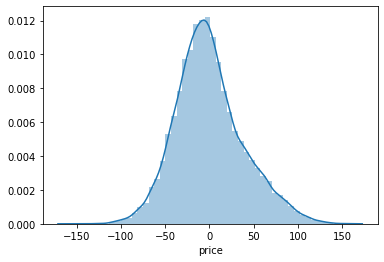

In [19]:
## plot
diff = y_train - y_train_pred
sns.distplot(diff)

In [20]:
# rmse for test data
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

38.60588447501037

In [21]:
# drop price
X_test = test_data.drop('price', axis=1)

In [22]:
y_test = test_data.price

In [25]:
y_test.head()

0    185.0
1     65.0
2    100.0
3    199.0
4    170.0
Name: price, dtype: float64

In [26]:
# y test prediction
y_test_pred = knn_model_3.predict(X_test)

In [27]:
# diff
diff = y_test - y_test_pred

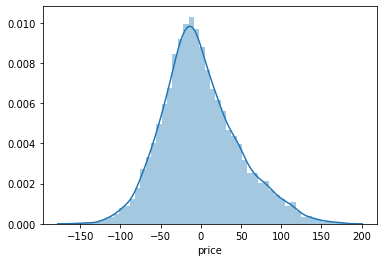

In [28]:
## plot
sns.distplot(diff)

In [29]:
## rmse for test data
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

47.628521920217764

#### Conclusion
cleaned data: RMSE (train): 35.684 RMSE (test): 44.204 
<br/>
cleaned data with log transformation: RMSE (train): 38.879 RMSE (test): 48.091
<br/>
principal components: RMSE (train): 38.606 RMSE (test): 47.629